# Análise de Riscos de Infarto em pessoas adultas

### Bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### Dataset

In [90]:
df = pd.read_csv('heart_data.csv', sep = ',')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Análise Exploratória

In [91]:
# Verificando a quantidade de linhas e colunas
df.shape

(70000, 14)

In [92]:
# Verificando a quantidade de dados 
df.size

980000

In [93]:
# Algumas informações a respeito do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [94]:
# Dados nulos
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Não temos dados nulos

In [95]:
# Verificando o tipo de cada coluna
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Não temos strings, apenas números

In [96]:
# Algumas informações estatísticas
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Colunas presentes no dataset
df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [98]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [99]:
# Transformando a idade em anos, pois estava em dias
df['age'] = (df['age']/365).astype(int)

In [100]:
# Deletando a coluna 'index' e 'id'
df = df.drop(['index','id'], axis=1)

In [101]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [102]:
# Quantidade de pessoas em cada nível de colesterol
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [103]:
# Quantidade de pessoas em cada nível de glicose
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [104]:
# Quantidade de pessoas fumantes e não fumantes
df['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [105]:
# Quantidade de pessoas que bebem bedida alcoólica e que não bebem
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [106]:
# Quantidade de pessoas que fazem atividade fisica e que não fazem
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [107]:
# Quantidade de pessoas que já tiveram algum problema cardiovascular e de pessoas que não tiveram
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Conseguimos identificar que 34979 pessoas já tiveram alguma doença cardiovascular

<AxesSubplot:title={'center':'Quantidade de pessoas com doença cardiovascular'}, xlabel='cardio', ylabel='count'>

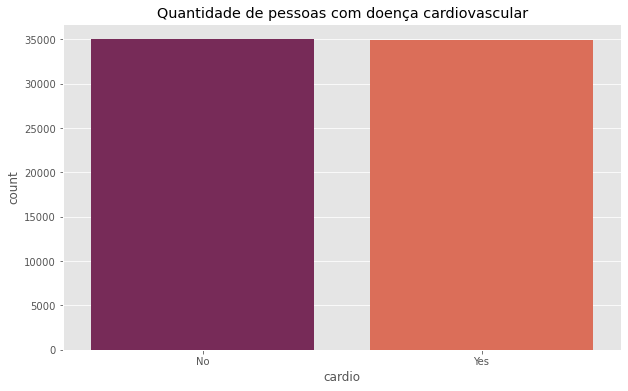

In [142]:
plt.figure(figsize=(10,6))
plt.title("Quantidade de pessoas com doença cardiovascular")
plt.xlabel("Doença Cardiovascular")
plt.ylabel("Quantidade")
sns.countplot(data=df, x='cardio', palette='rocket')

In [109]:
%%time
df['imc'] = 10000*df['weight']/(df['height']*df['height'])

# Coluna 'imc' adicionada e verificação de tempo resposta

CPU times: total: 0 ns
Wall time: 1.03 ms


In [110]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [111]:
# Nova coluna chamada 'class_imc' mostrando a descrição de cada nível IMC

condicoes = [
    (df['imc'] < 18.5),
    ((df['imc'] >= 18.5) & (df['imc'] < 25)),
    ((df['imc'] >= 25) & (df['imc'] < 30)),
    (df['imc'] > 30)
]

classificacao = ['baixo_peso', 'normal', 'sobrepeso', 'obesidade']
df['class_imc']= np.select(condicoes, classificacao, default=np.nan)

In [112]:
df[(df['ap_hi'] < 90)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,class_imc
209,49,2,172,62.0,80,70,1,1,0,0,1,0,20.957274,normal
383,53,1,147,41.0,80,50,1,1,0,0,1,0,18.973576,normal
567,58,1,168,78.0,14,90,2,1,0,0,1,1,27.636054,sobrepeso
636,56,2,169,68.0,70,110,1,1,0,0,1,0,23.808690,normal
927,59,2,175,70.0,14,90,3,1,0,0,1,1,22.857143,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,51,1,158,74.0,14,90,1,1,0,0,1,1,29.642685,sobrepeso
68998,52,1,154,77.0,14,90,1,1,0,0,1,0,32.467532,obesidade
69137,42,2,176,65.0,12,80,1,1,0,0,1,0,20.983988,normal
69265,41,1,165,47.0,80,60,2,1,0,0,1,0,17.263545,baixo_peso


In [113]:
# Nova coluna chamada 'pressao' monstrando a descrição da Pressão

pressao_cond = [
    (df['ap_hi'] < 120),
    ((df['ap_hi'] >= 120) & (df['ap_hi'] < 139)),
    ((df['ap_hi'] >= 139) & df['ap_hi'] < 140)
]

classificador = ['Normal', 'Em risco', 'Pressão Alta']
df['pressao'] = np.select(pressao_cond,classificador,default=np.nan)

In [114]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,class_imc,pressao
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal,Normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obesidade,Pressão Alta
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal,Em risco
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,sobrepeso,Pressão Alta
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal,Normal


In [115]:
# Correlação 
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985,0.085404
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.096529
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.290642
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.762009
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.024852
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.035345
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.146270
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.101390
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.027215
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.014394


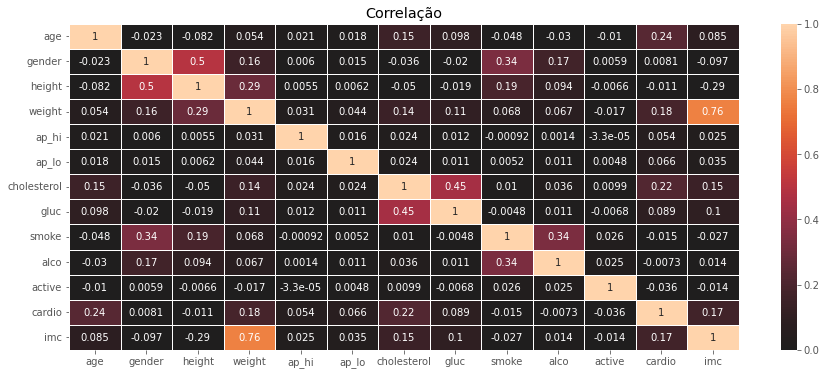

In [116]:
# Gráfico heatmap mostrando a correlação. 
# Quanto mais claro mais próximo de 1, quanto mais escuro mais proximo de 0

plt.figure(figsize=(15,6))
plt.title("Correlação")
_ = sns.heatmap(data=df.corr(), annot=True, center=0, vmin=0, vmax=1, linewidth=0.5)

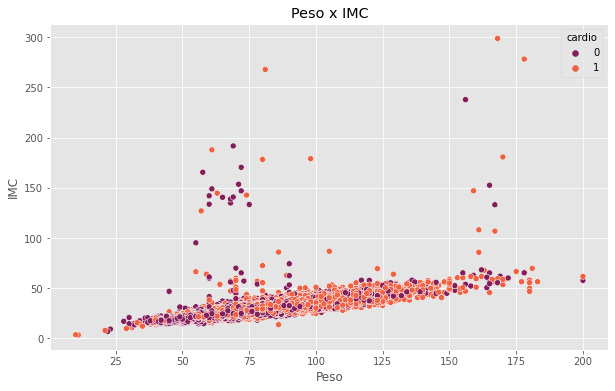

In [117]:
# Correlação entre peso e imc tendo como categoria quem já teve alguma doença cardiovascular

plt.figure(figsize=(10,6))
plt.title("Peso x IMC")
plt.xlabel("Peso")
plt.ylabel("IMC")
_= sns.scatterplot(data=df, x='weight', y='imc', hue='cardio', palette='rocket')


A medida que o peso aumenta, a taxa de IMC também.

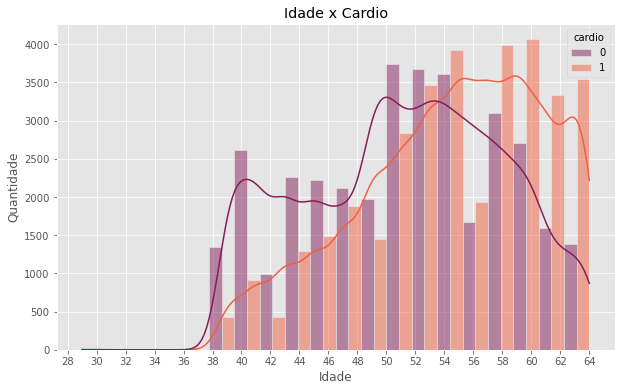

In [118]:
# Quantidade de pessoas que já tiveram alguma doença cardiovascular por idade
plt.figure(figsize=(10,6))
plt.title("Idade x Cardio")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.xticks(np.arange(28,70,2))
_= sns.histplot(data=df, x='age', hue='cardio', bins=20, multiple='dodge', kde=True, palette='rocket')

Aqui podemos ver a quantidade de pessoas que já tiveram alguma doença cardiovascular e as pessoas que não tiveram, por idade.

Podemos ver que o número de pessoas que já tiveram uma doença cardiovascular começa a ultrapassar a quantidade de pessoas que não tiveram nenhuma doença cardiovascular apartir dos 52-54 anos.

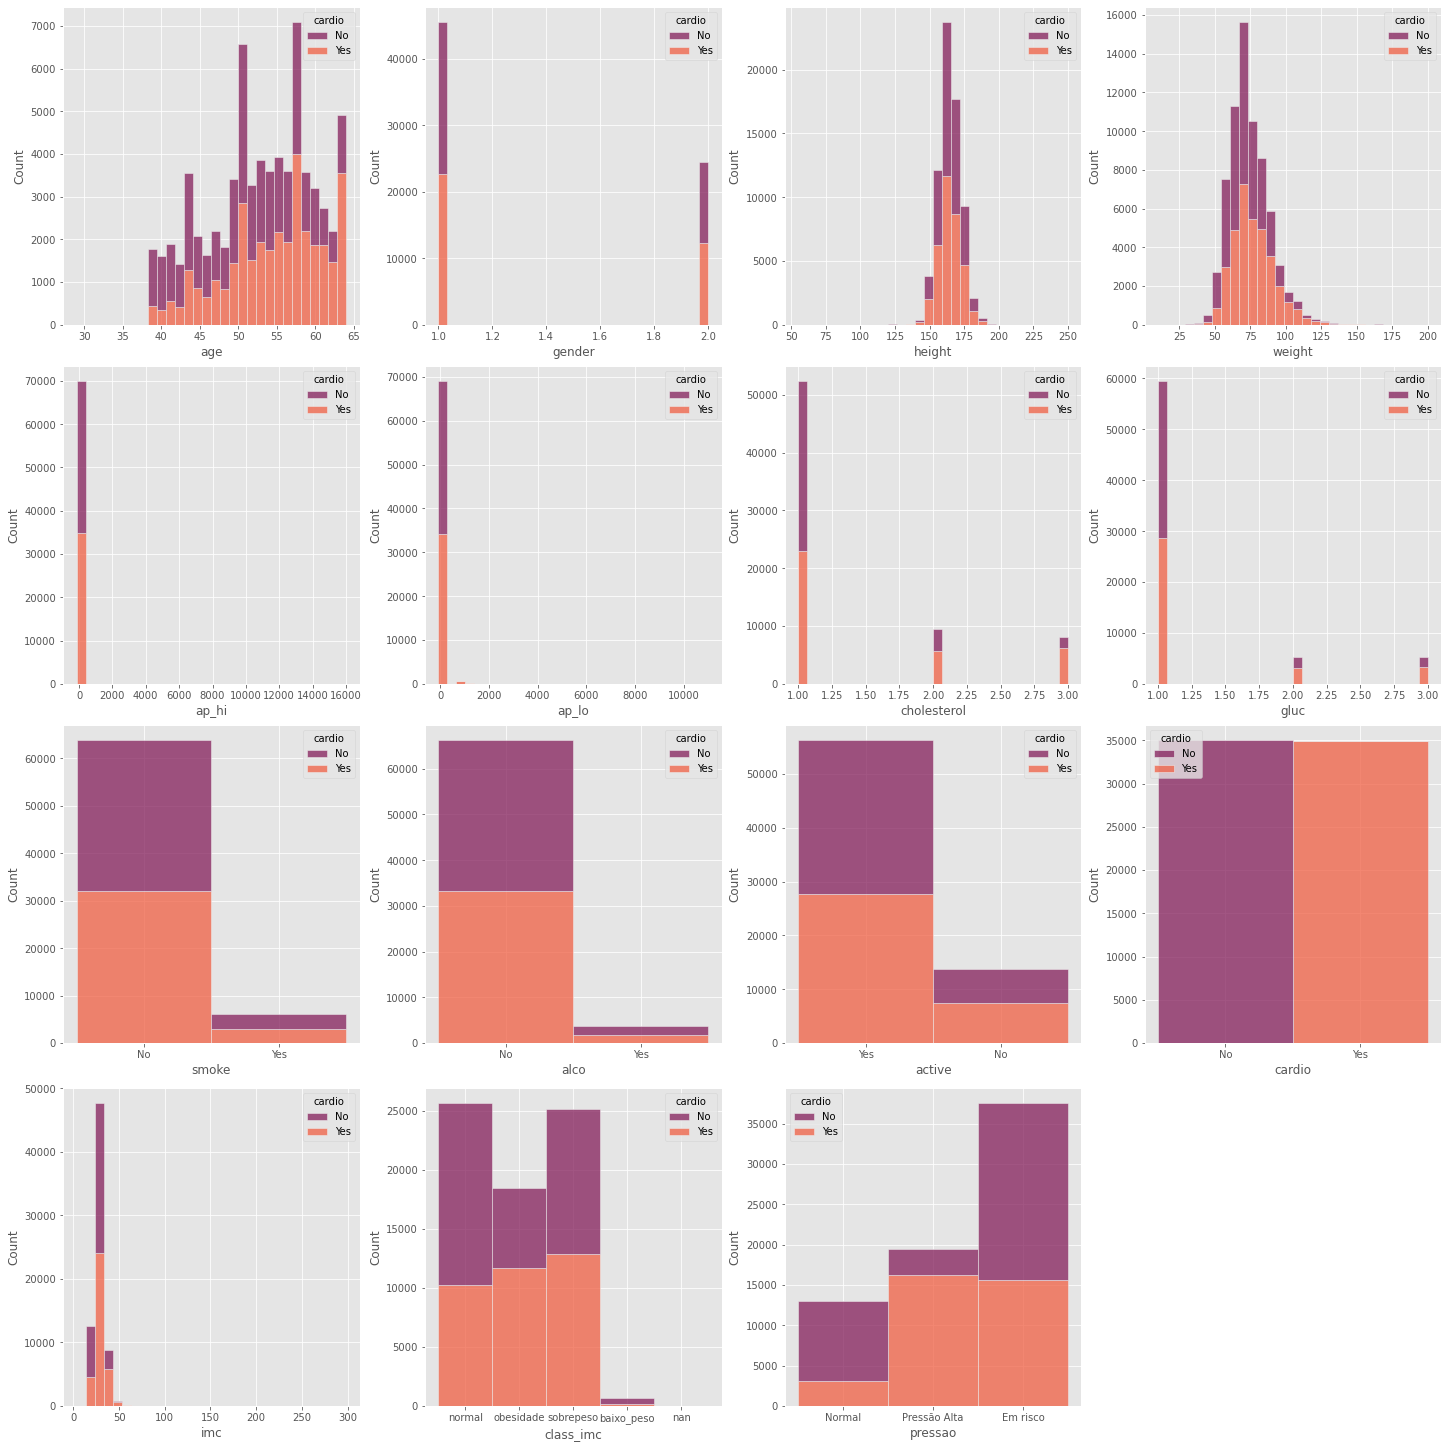

In [148]:
# Gráfico mostrando a quantidade de pessoas que já tiveram e que não tiveram alguma doneça cardiovascular, por cada indicador
fig = plt.figure(figsize=(20, 20), constrained_layout = True)
for x in range(len(df.columns)):
    plt.subplot(4,4,x+1)
    sns.histplot(data=df, x=df[df.columns[x]], hue='cardio', bins=30, multiple='stack', palette='rocket')

In [120]:
# Função para alterar os valores binários, 0 = No | 1 = Yes
def change(x):

    if x == 0:
        x = 'No'
    elif x == 1:
        x = 'Yes'

    return x

In [121]:
df['smoke'] = df['smoke'].apply(lambda x: change(x))
df['alco'] = df['alco'].apply(lambda x: change(x))
df['active'] = df['active'].apply(lambda x: change(x))
df['cardio'] = df['cardio'].apply(lambda x: change(x))

In [122]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,class_imc,pressao
69995,52,2,168,76.0,120,80,1,1,Yes,No,Yes,No,26.927438,sobrepeso,Em risco
69996,61,1,158,126.0,140,90,2,2,No,No,Yes,Yes,50.472681,obesidade,Pressão Alta
69997,52,2,183,105.0,180,90,3,1,No,Yes,No,Yes,31.353579,obesidade,Pressão Alta
69998,61,1,163,72.0,135,80,1,2,No,No,No,Yes,27.099251,sobrepeso,Em risco
69999,56,1,170,72.0,120,80,2,1,No,No,Yes,No,24.913495,normal,Em risco


In [123]:
# Colocando em uma lista o nome das colunas que são indicadores de qualidade de vida
indic_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'class_imc', 'pressao']

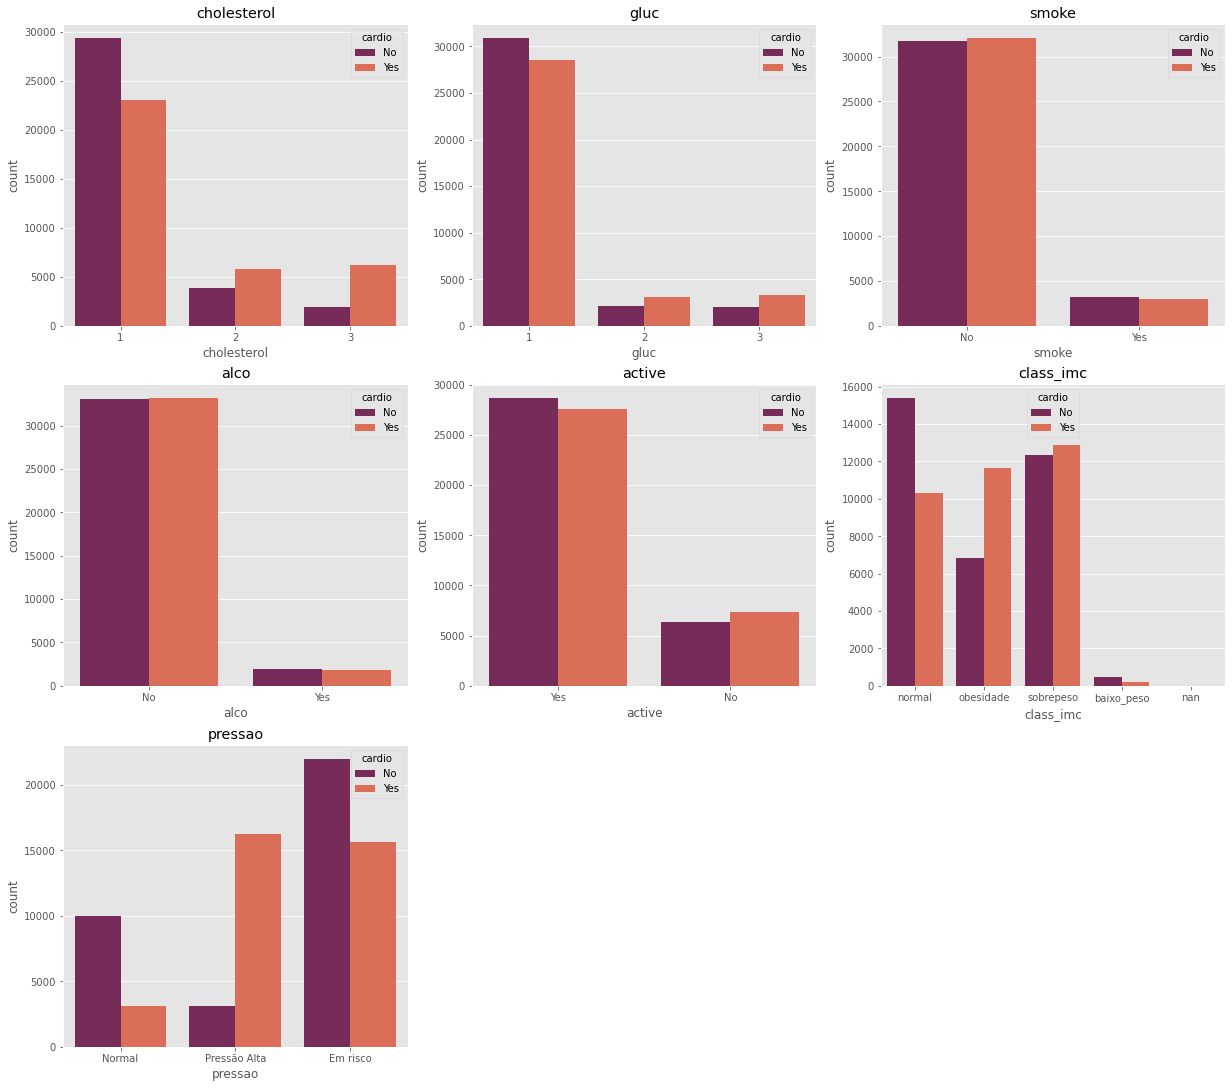

In [124]:
# Gráfico que mostra a quantidade de pessoas que já tiveram doenças cardiovasculares e que não tiveram, por cada indicador de qualidade de vida.
fig = plt.figure(figsize=(17,15), constrained_layout=True)
for x in range(len(indic_columns)):
    plt.subplot(3,3,x+1)
    plt.title(f"{indic_columns[x]}")
    plt.ylabel("Quantidade")
    sns.countplot(data=df, x=df[indic_columns[x]], hue='cardio', palette='rocket')

Com esses indicadores podemos identificar que colesterol, glicose, imc e pressão são indicadores que devemos levar em conta.

Aparentemente não temos um impacto em ter doenças cardiovasculares ao ser fumante ou ingerir bebida alcoolica.

Seria incorreto afirmar que pessoas que não praticam atividades físicas têm mais propensão a obter uma doença cardiovascular. Vamos ver os números: 

Temos alguns indicadores que mostram que sua elevação oferece um maior risco a ter uma doença cardiovascular, como por exemplo, o IMC e a pressão.

IMC: Ter um IMC no valor considerado a "obesidade" pode ter uma maior chance de adquirir uma doença cardiovascular.

PRESSÃO: Ter a pressão alta contribui para adquirir uma doença cardiovascular.

In [145]:
# Quantidade de pessoas (Exercicio Fisico x Doença cardiovascular) em %
df[['active','cardio']].value_counts(normalize=True)*100

active  cardio
Yes     No        40.918571
        Yes       39.454286
No      Yes       10.515714
        No         9.111429
dtype: float64

In [144]:
# Quantidade de pessoas (Exercicio Fisico x Doença cardiovascular)
df[['active','cardio']].value_counts()

active  cardio
Yes     No        28643
        Yes       27618
No      Yes        7361
        No         6378
dtype: int64

Nossa população consiste em 55.961 pessoas que praticam atividade física e 13.739 em pessoas que não praticam atividade física

Dentro da população que pratica atividade física, 27.618 pessoas adquiriram alguma doença cardiovascular e 28.643 não adquiriram, tendo uma diferença de apenas 1.025, se fosse para dizer que "Quem pratica atividade física tem menor propensão a adquirir uma doença cardiovascular", então teriamos que ter um crescimento positivo em pessoas que não adquiriram alguma doença carviovascular praticando atividade fisica e um aumento em pessoas com alguma doença cardiovascular que não pratica atividade fisica.

Dentro da população que não pratica atividade física, 7.361 pessoas adquiriram alguma doença cardiovascular e 6.378 não adquiriram

De fato conseguimos ver uma certa diferença entre pessoas que praticaram alguma atividade física ou não, mas essa diferença é pouca. Com base nesses dados não conseguimos ver se há uma correlação

Text(0, 0.5, 'Quantidade')

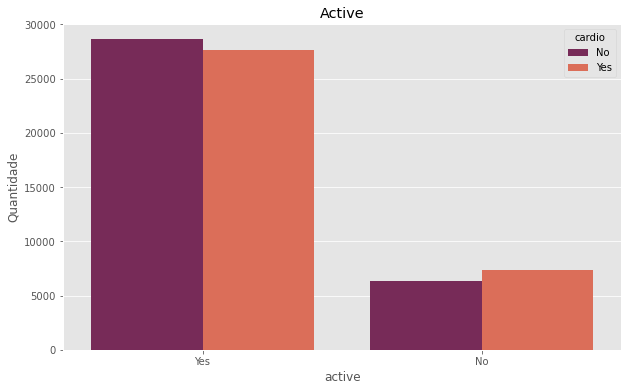

In [146]:
# Gráfico de quantidade de pessoas que adquiriram alguma doença cardiovascular, no indicador "atividade física"
plt.figure(figsize=(10,6))
plt.title("Active")
sns.countplot(data=df, x='active', hue='cardio', palette='rocket')
plt.ylabel("Quantidade")

Em contrapartida conseguimos ver que pessoas que tem "Pressão Alta" são mais propensas a adquirir alguma doença cardiovascular

In [128]:
# Quantidade de pessoas (Pressão x Doença cardiovascular) em %
df[['pressao','cardio']].value_counts(normalize=True)*100

pressao       cardio
Em risco      No        31.335714
Pressão Alta  Yes       23.241429
Em risco      Yes       22.308571
Normal        No        14.205714
Pressão Alta  No         4.488571
Normal        Yes        4.420000
dtype: float64

In [129]:
# Quantidade de pessoas (Pressão x Doença cardiovascular)
df[['pressao','cardio']].value_counts()

pressao       cardio
Em risco      No        21935
Pressão Alta  Yes       16269
Em risco      Yes       15616
Normal        No         9944
Pressão Alta  No         3142
Normal        Yes        3094
dtype: int64

Text(0, 0.5, 'Quantidade')

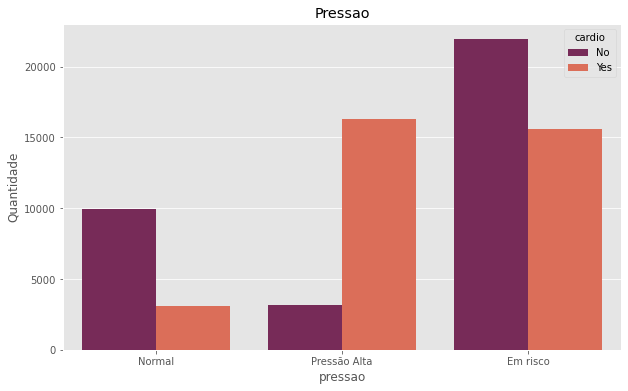

In [130]:
# Gráfico de quantidade de pessoas que adquiriram alguma doença cardiovascular no indicador "Pressão" 
plt.figure(figsize=(10,6))
plt.title("Pressao")
sns.countplot(data=df, x='pressao', hue='cardio', palette='rocket')
plt.ylabel("Quantidade")

In [131]:
pressao_alta = df[(df['pressao'] == 'Pressão Alta')]

In [132]:
pressao_alta['cardio'].value_counts(normalize=True)*100

Yes    83.813302
No     16.186698
Name: cardio, dtype: float64

Das pessoas que tem pressão alta, 83% adquiriram alguma doença cardiovascular e 16% não adquiriram.